🟢 No current problems: https://downdetector.com/status/box/
Most reported problems:
100% Website


🟢 No current problems: https://downdetector.com/status/zoom/
Most reported problems:
48% Server Connection
34% Starting Conference
18% App


🟢 No current problems: https://downdetector.com/status/service-now/
Most reported problems:
64% Website
29% Total blackout
7% Managed Services


🟢 No current problems: https://downdetector.com/status/netsuite/
Most reported problems:
100% Server Connection


🟡 Having possible problems: https://downdetector.com/status/microsoft-365/
Most reported problems:
42% Onedrive
30% Server Connection
28% Outlook




🟢 No current problems: https://downdetector.com/status/reddit/
Most reported problems:
63% Website
23% App
14% Server Connection


🟢 No current problems: https://downdetector.com/status/life360/
Most reported problems:
89% App
11% Login


🟢 No current problems: https://downdetector.com/status/yahoo/
Most reported problems:
64% Website
26% Login
10% 

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (14,) and arg 1 with shape (3,).

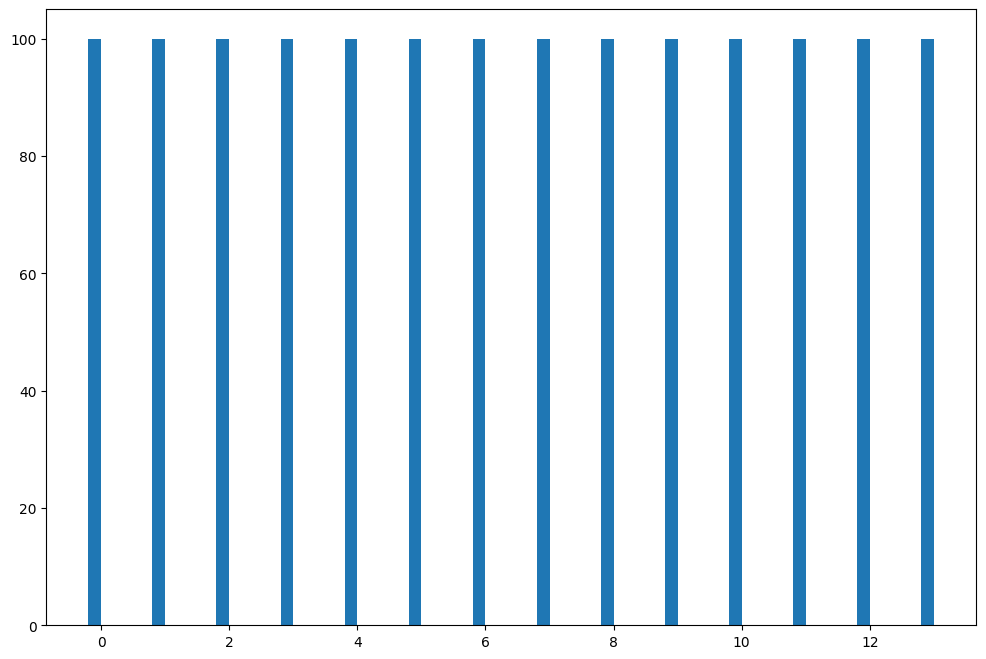

In [6]:
# Max Gadeberg
# Aug 29, 2024

import matplotlib.pyplot as plt
import numpy as np
import csv
from selenium import webdriver
import re

urls = []

csv_file = 'sites.csv'

with open(csv_file, 'r', newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        if row:
            urls.append(row[0])

driver = webdriver.Firefox()

problem_data = {}

for url in urls:
    driver.get(url)
    if url == 'https://downdetector.com/status/reddit/':
        print('\n')

    try:
        page_source = driver.page_source
        
        match_no_problems = re.search(r'User reports indicate no current problems', page_source)
        match_possible_problems = re.search(r'User reports indicate possible problems', page_source)
        match_problems = re.search(r'User reports indicate problems', page_source)
        
        matches = re.findall(r'data:\s*\[\s*(\d+\.\d+)\s*,\s*\(100\s*-\s*\d+\.\d+\)\s*\]', page_source)
        labels_matches = re.findall(r'<div class="text-center text-muted indicatorChart_name">\s*(.*?)\s*</div>', page_source, re.S)
        
        rounded_percentages = [round(float(match)) for match in matches]
        labels = [label.strip() for label in labels_matches]
        
        if match_no_problems:
            status = "🟢 No current problems"
        elif match_possible_problems:
            status = "🟡 Having possible problems"
        elif match_problems:
            status = "🔴 Having problems"
        else:
            status = "❓ Status unclear"

        print(f"{status}: {url}")

        if labels and rounded_percentages:
            problem_data[url] = {
                'labels': labels,
                'percentages': rounded_percentages,
                'status': status
            }

        if labels and rounded_percentages:
            print("Most reported problems:")
            for label, percentage in zip(labels, rounded_percentages):
                print(f"{percentage}% {label}")

        print('\n')

    except Exception as e:
        print(f"{url}: Unable to determine status (error: {str(e)})")

driver.quit()

# Prepare data for grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
url_labels = []
bar_positions = np.arange(len(problem_data))  # Adjusted to match number of sites
print(bar_positions)

# Iterate over problem_data and plot each group
for idx, (url, data) in enumerate(problem_data.items()):
    labels = data['labels']
    percentages = data['percentages']
    status = data['status']

    # Ensure x_positions matches the number of bars (labels) for each site
    x_positions = bar_positions + idx * bar_width - (len(labels) * bar_width / 2)
    print(x_positions, percentages, bar_width, status)
    ax.bar(x_positions, percentages, bar_width, label=status)

    url_labels.append(url.split('/')[-2])

# Set labels and title
ax.set_xlabel('Problem Type')
ax.set_ylabel('Percentage (%)')
ax.set_title(f'Most Reported Problems by Site')
ax.set_xticks(bar_positions)
ax.set_xticklabels(url_labels)
ax.legend()

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
